In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv('olist/olist_orders_dataset.csv')
customers = pd.read_csv('olist/olist_customers_dataset.csv')

In [3]:
print(customers.shape, orders.shape)

(99441, 5) (99441, 8)


In [4]:
display(customers.head(3))
display(orders.head(3))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [5]:
# customers와 orders merge
df = pd.merge(customers, orders, how="left", on="customer_id")
df.shape

(99441, 12)

In [6]:
# 결과 확인
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


# 재구매 Funnel 분석

In [7]:
# customer 유니크 아이디 당 구매 회수 집계
# axis 명 변경
id_cnt = df["customer_unique_id"].value_counts().rename_axis('customer_unique_id').to_frame('id_counts')
id_cnt

,id_counts
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
1b6c7548a2a1f9037c1fd3ddfed95f33,7
ca77025e7201e3b30c44b472ff346268,7
6469f99c1f9dfae7733b25662e7f1782,7
...,...
081f07439678af2da7755a0aa572154d,1
9c57789a6a587f4efcfb01e36c106014,1
9e4c21635f640562de1a6976374fba03,1


In [8]:
# id_counts 3번 이상은 3으로 묶기
id_cnt.loc[(id_cnt["id_counts"] >= 3), "id_counts"] = 3

<AxesSubplot:xlabel='id_counts', ylabel='count'>

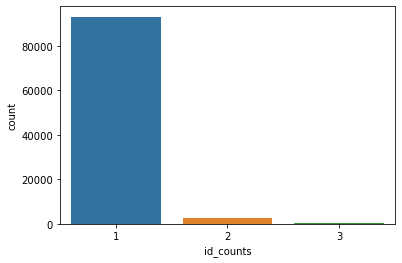

In [9]:
# id 당 구매 회수 시각화
sns.countplot(data=id_cnt, x = 'id_counts')

In [10]:
# 퍼널 숫자 값 Funnel list에 추가
funnel_list = id_cnt['id_counts'].value_counts().to_list()
funnel_list.insert(0, df['customer_unique_id'].nunique()) # 전체 유저 수 첫 행에 추가
funnel_list

[96096, 93099, 2745, 252]

In [11]:
# pip install -U kaleido

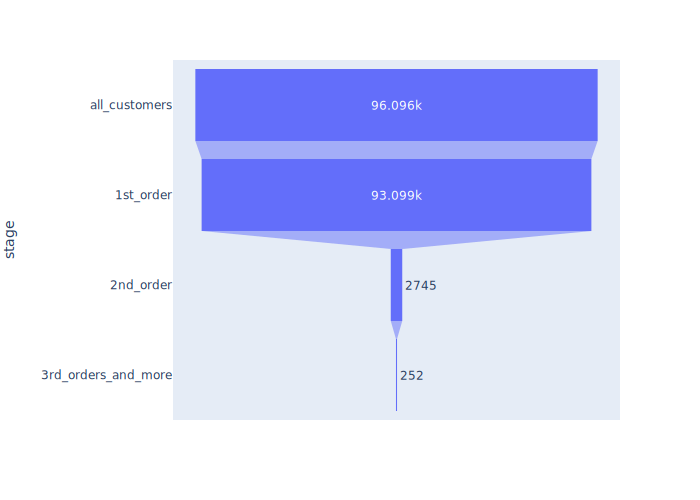

In [12]:
# plotly를 활용한 Funnel 시각화

import plotly.express as px
data = dict(
    number=funnel_list,
    stage=["all_customers","1st_order", "2nd_order", "3rd_orders_and_more"])
fig = px.funnel(data, x='number', y='stage')
# fig.show()
fig.show(renderer="svg")

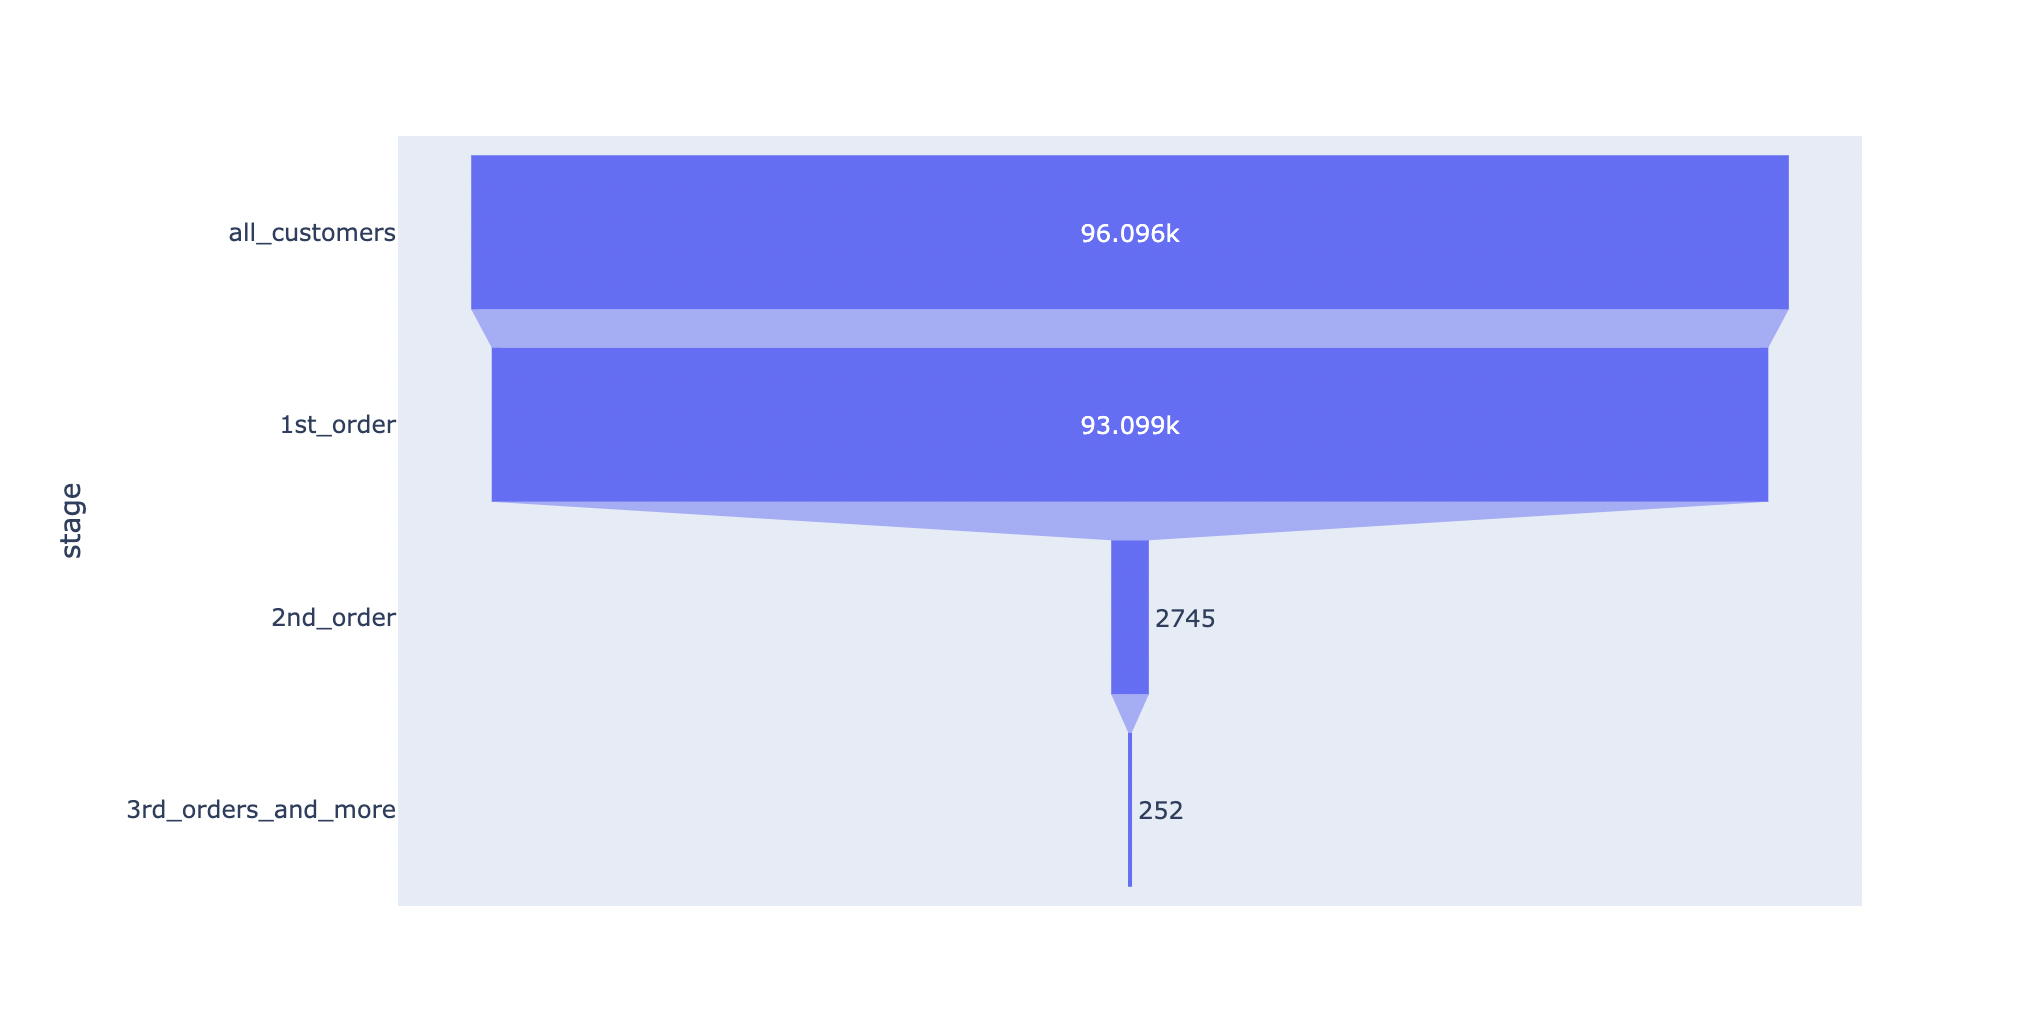

# 고객별 구매일 계산하기

In [13]:
# date 타입으로 변경
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

In [14]:
# 고객별 최신 구매 날짜
max_date = df[['customer_unique_id',"order_purchase_timestamp"]].sort_values(by='customer_unique_id')
max_date

,customer_unique_id,order_purchase_timestamp
64012,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
24570,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
40832,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
57118,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
81150,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
89147,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
9810,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
69017,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
94891,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [15]:
# 전체 통합 데이터 불러오기
df_all = pd.read_csv('olist/olist_all.csv')

In [16]:
df_all.shape

(119143, 40)

In [17]:
# 재구매 기록이 있는 고객 아이디 명
funnel_idx = id_cnt[id_cnt['id_counts']>1].index

In [18]:
#재구매 기록이 있는 고객의 전체 order list
df = df_all[df_all['customer_unique_id'].isin(funnel_idx)]
df.shape

(8739, 40)

In [19]:
# 1회 구매 후 이탈한 고객들의 데이터 프레임
df_churn = df_all[~df_all['customer_unique_id'].isin(funnel_idx)]
df_churn.shape

(110404, 40)

In [20]:
# 재구매 고객의 평점 평균
print(df.review_score.mean())

4.061156069364162


In [21]:
# 이탈 고객의 평점 평균
df_churn.review_score.mean()

4.011982172864762

In [22]:
# 전체 구매 고객의 평점 평균
print(df_all.review_score.mean())

4.015582414978078


<AxesSubplot:xlabel='review_score', ylabel='count'>

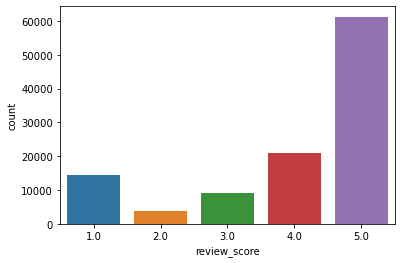

In [23]:
# 재구매 기록이 있는 주문의 평점 평균
sns.countplot(data=df_churn, x='review_score')

In [24]:
# 재구매 경험이 있는 고객들의 평점 비율
df.groupby('review_score')['order_id'].count() / df.shape[0]

review_score
1.0    0.123012
2.0    0.035702
3.0    0.081588
4.0    0.166953
5.0    0.582561
Name: order_id, dtype: float64

In [25]:
# 전체 구매 경험이 있는 고객들의 평점 비율
df_all.groupby('review_score')['order_id'].count() / df_all.shape[0]

review_score
1.0    0.129491
2.0    0.034933
3.0    0.083043
4.0    0.187330
5.0    0.556835
Name: order_id, dtype: float64

<AxesSubplot:xlabel='review_score', ylabel='count'>

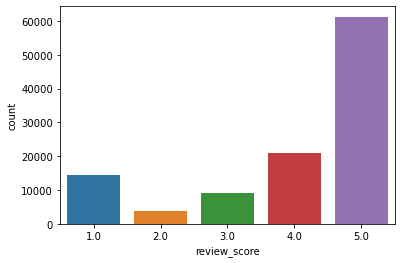

In [26]:
#재구매 기록이 없는 주문의 평점 평균 시각화
sns.countplot(data=df_churn, x='review_score')